In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv("../data/processed/cleaned_combined_data.csv")
df.rename(columns={'Annual working hours per worker': 'Annual Working Hrs', 'GDP per capita (output, multiple price benchmarks)': 'GDP per capita',
                  'Population (historical estimates)': 'Population', 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)': 'Vacation Days',
                  'Productivity: output per hour worked': 'Productivity'}, inplace=True)

df_calc = df.copy()
df_calc['Calculated Productivity'] = 2*df['GDP per capita']/df['Annual Working Hrs'] 
df_calc['GDP per Vacation Days'] = df['GDP per capita'] / df['Vacation Days']

df_noUS = df.copy()   
df_noUS.drop(df_noUS[df_noUS['Entity'] == 'United States'].index, inplace = True)

df_vac = df[df['Vacation Days'] > 35] 
df_last20 = df[df['Year'] > 2000] #make a method?
df_spain = df[df['Entity'] == 'Spain'] 

In [4]:
def makeHeatMap(data):
    df_mx = data.corr()
    ht = sns.heatmap(df_mx, annot = True, cmap = 'flare')

In [5]:
def getyear(data, start_year):
    new = data[data['Year'] > start_year]
    return new

In [6]:
def getcountry(data, country):
    new = data[data['Entity'] == country] 
    return new

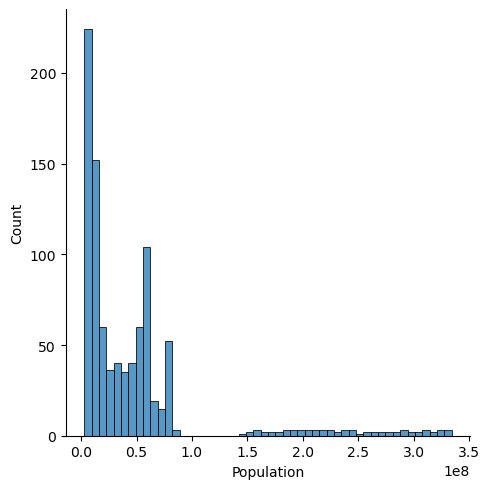

In [7]:
#Most of our data is looking at countries/years with populations of less than 100million, 
#while a few exceptions are in the >100 million population range
sns.displot(df['Population'], bins = 50)

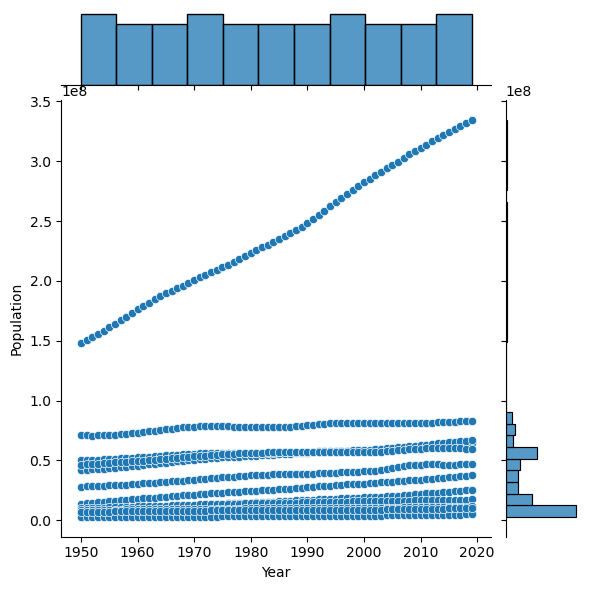

In [8]:
sns.jointplot(x='Year', y='Population', data = df)
#One single country, the US, dominating in terms of population for our data. 
#For that reason, I created a separate dataset without the US.


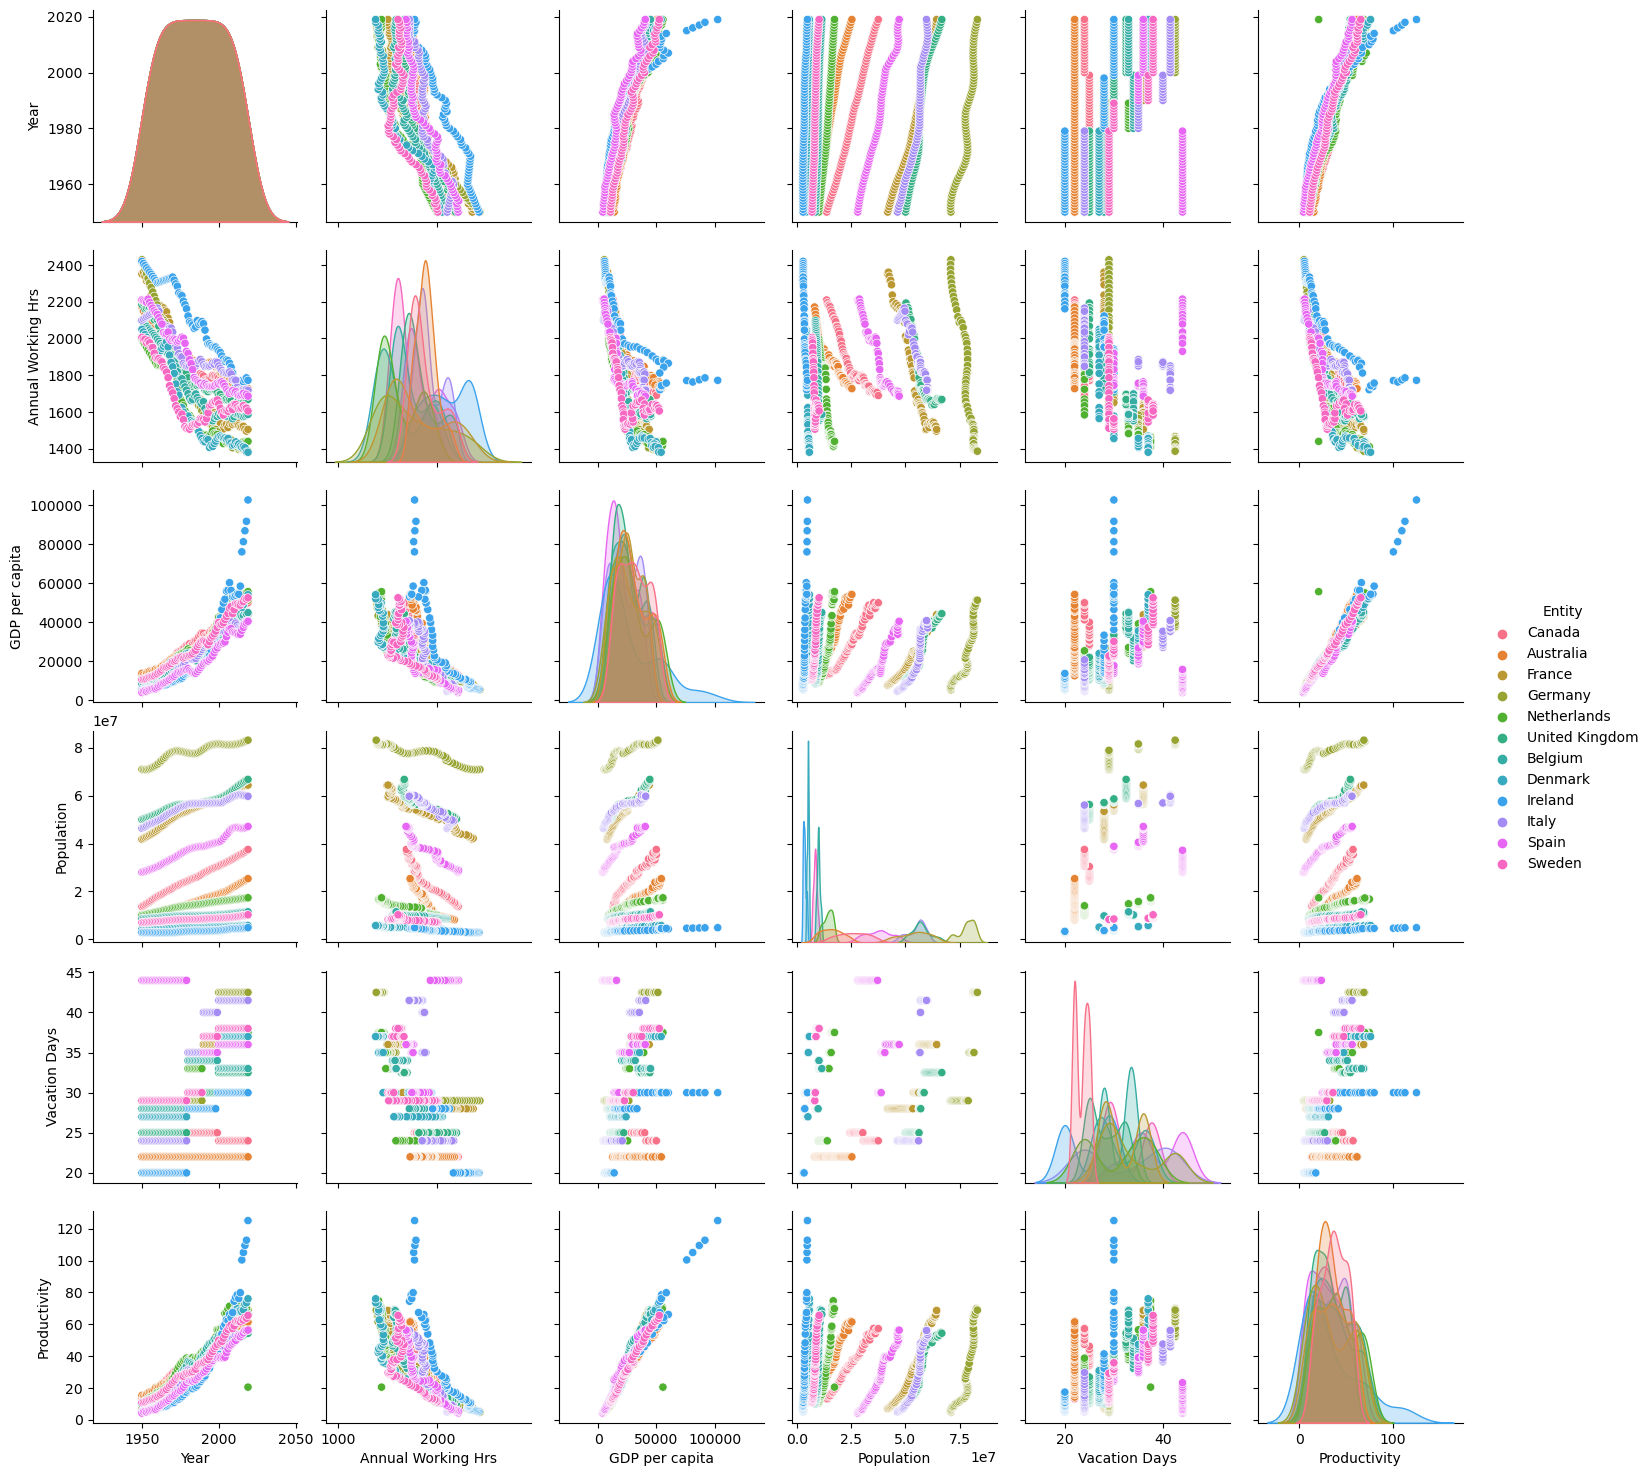

In [ ]:
sns.pairplot(df_noUS, hue='Entity')
#From this some trends seem to emerge: as population increases, 
#average working hours decrease or alternatively, as year increases, average working hours decrease).

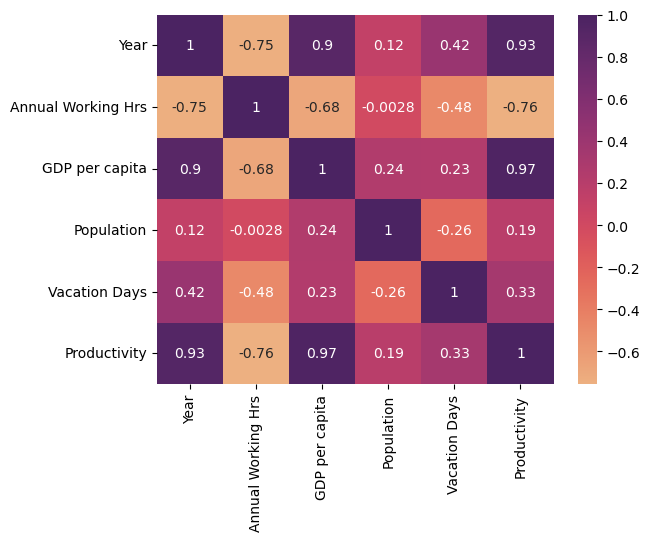

In [ ]:
#Interestingly annual working hours is negatively correlated with productivity.
makeHeatMap(df)

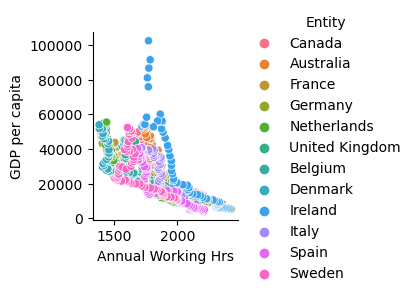

In [ ]:
sns.pairplot(df_noUS, hue='Entity', x_vars = 'Annual Working Hrs', y_vars = 'GDP per capita')
#Some spikes in GDP per capita in ireland might be worth investigating, but it appears as annual working hours decrease,
#GDP per capita increases. Probably due to other reasons.

<AxesSubplot:xlabel='Vacation Days', ylabel='Productivity'>

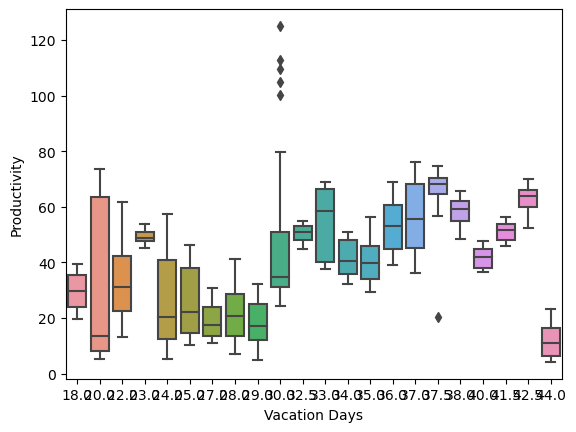

In [ ]:
sns.boxplot(x='Vacation Days', y='Productivity', data = df)
#appears that between 30 and 42 vacation days per year is correlated with higher productivity.

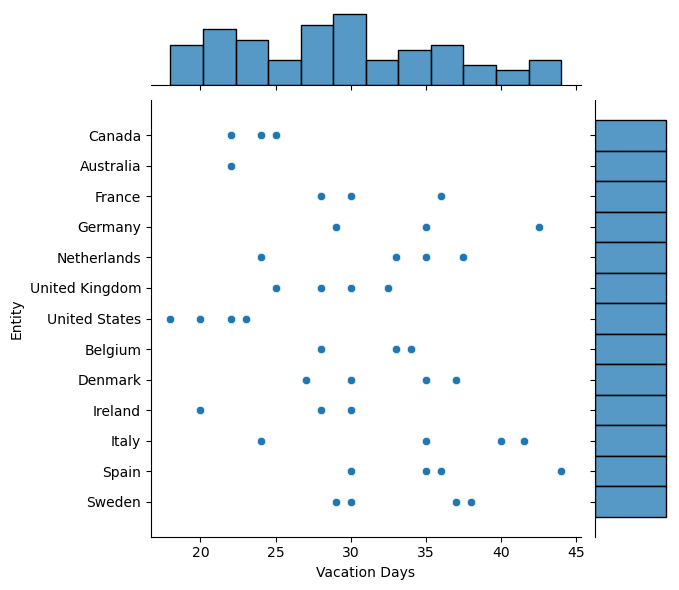

In [ ]:
df_vac = [df['Vacation Days'] > 35]
sns.jointplot(x = 'Vacation Days', y = 'Entity',data = df)
#can see that there is less data available on vacation days in the 42-45 range, possibly leading to some outliers there.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

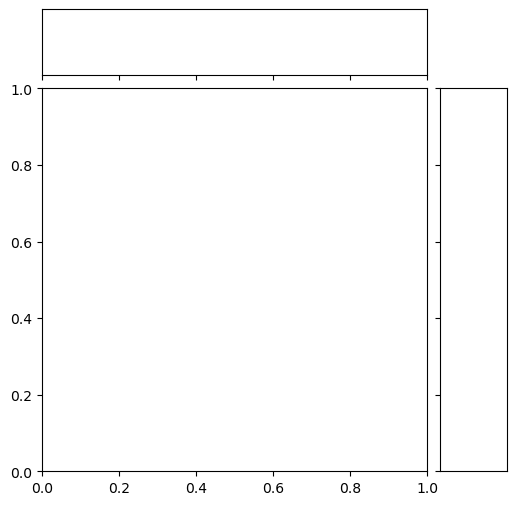

In [ ]:
sns.jointplot(x = 'Vacation Days', y = 'Entity', data = df_vac)

#Narrowing down some of the data to just countries with >35 vacation days in a year

In [ ]:
sns.jointplot(x = 'Year', y = 'Entity', data = df_vac)

In [ ]:
sns.pairplot(df_spain, hue='Entity')

In [ ]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Year', y='GDP per capita', data=df_last20, color='orange')

In [ ]:
plt.figure(figsize=(20,5))
dn = getyear(df,2000)
sns.kdeplot(y='GDP per capita', x='Annual Working Hrs', data=dn, color='orange')
#In the last 20 years, it doesnt seem like annual working hours has much of an impact on GDP per capita.

In [ ]:
sns.jointplot(x='Year', y='GDP per Vacation Days', data = df_calc)